# Image Compression using PCA
## Concept
Here I try to represent the image in fewer dimensions than the actual image size and then reconstruct it from the pca based representation. This results in fewer dimensions needed to represent the data. This is submitted as a solution for the weekly challenge of [this](https://www.youtube.com/watch?v=jPmV3j1dAv4) video by Siraj Raval.
## Import Packages

In [128]:
import numpy as np
from matplotlib import pylab as plt

In [129]:
from PIL import Image
img = Image.open('shakira.jpg').convert('LA') #Convert the image to gray-scale.
img.save('shakira_gray.png') #Save gray-scale image.

## PCA
This is where pca is done and the necessary components alone are chosen. This results in an image of fewer dims. Later it can be seen that smaller image + eigen vectors can be used to reconstruct the image with acceptable loss.

In [156]:
def pca(img, num_components = 0):
    std_img = (img-np.mean(img.T,axis=1)).T # Make image 0 mean.
    [eig_vals, eig_vecs] = np.linalg.eig(np.cov(std_img)) # Find eigen values and eigen vectors of the covariance matrix.
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))] #Get the value-vector pair.
    eig_pairs.sort(key=lambda x: x[0], reverse=True) #Arrange in decreasing order of values, higher value is more information.
    # print('Eigenvalues in descending order:')
    # for i in eig_pairs:
    #     print(i[0])
    if num_components < np.size(eig_vecs, axis=1) and num_components >= 0: 
        eig_vecs = eig_vecs[:,range(num_components)] #Choose only required components, lesser components = lesser memory used
    #     print(eig_vecs)
    ax_img = np.dot(eig_vecs.T,std_img) #Create image on the new components.
    print('Shape of image is '+ str(img.shape))
    print('Shape of eigen vector is '+ str(eig_vecs.shape))
    print('Shape of compressed image is '+ str(ax_img.shape))
    print('Compression is '+str((ax_img.shape[0]*ax_img.shape[1] + eig_vecs.shape[0]*eig_vecs.shape[1])* 1.0 /(img.shape[0] * img.shape[1])))
    return eig_vecs, ax_img, eig_vals

## PCA Driver
Here we run pca for various component levels and see the results. The compression is measured as a metric of the ratio of space used by both the vector and compressed image to the actual image. It is seen that even at 60 components a good reproduction of the image is available. It is only 64% of the actual size of the image. Here the difference between actual image and the reconstructed image is also plotted as a distance metric as the last plot. It can be seen that using lesser space results in a poor reconstruction of the image. There is a trade-off between the image reconstruction accuracy and the size of compressed image. This can be seen in the last plot.

In [157]:
from cmath import polar
def pca_driver():
    img = plt.imread('shakira_gray.png') # load an image
    print(img.shape)
    img = img[:, :, 1]
    plt.imshow(img)
    plt.gray()
    plt.show()
    print(img.shape)
    full_pc = np.size(img, axis=1)
    i = 1
    dist = []
    for num_components in range(0,full_pc+10,10):
        eig_vec, ax_img, eig_vals = pca(img, num_components)
        img_reconstructed = np.dot(eig_vec, ax_img).T+np.mean(img,axis=0)
        dist.append(np.linalg.norm(img-img_reconstructed,'fro'))
        #ax = plt.subplot(6,2,i,frame_on=False)
        #ax.xaxis.set_major_locator(plt.NullLocator())
        #ax.yaxis.set_major_locator(plt.NullLocator())
        i += 1
        plt.imshow(np.abs(img_reconstructed))
        plt.title('PCs # '+str(num_components))
        plt.gray()
        plt.show()

    plt.figure()
    plt.imshow(img)
    plt.title('All Components')
    plt.gray()
    plt.show()
    dist = dist/max(dist)
    plt.figure()
    plt.plot(range(0,full_pc+10,10),dist,'r')
    plt.axis([0,full_pc,0,1.1])
    plt.show()
    return

(177, 284, 4)


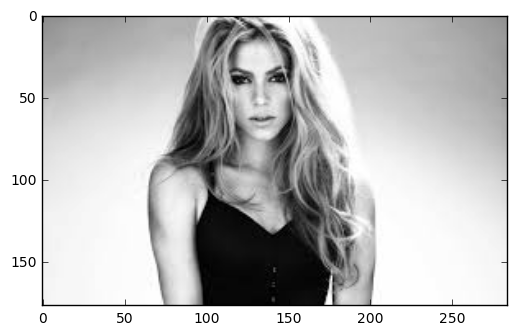

(177, 284)
Shape of image is (177, 284)
Shape of eigen vector is (284, 0)
Shape of compressed image is (0, 177)
Compression is 0.0


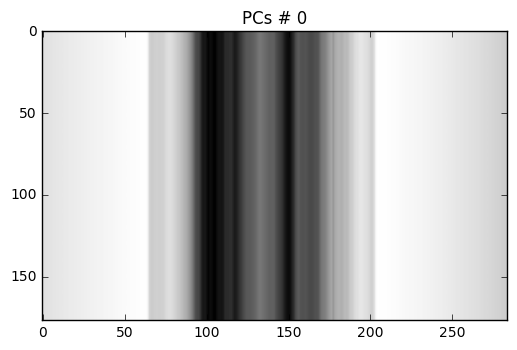

Shape of image is (177, 284)
Shape of eigen vector is (284, 10)
Shape of compressed image is (10, 177)
Compression is 0.09170844274687674


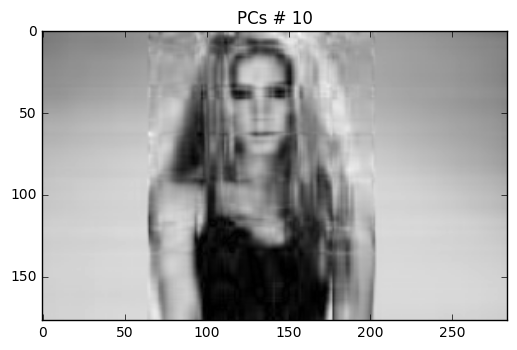

Shape of image is (177, 284)
Shape of eigen vector is (284, 20)
Shape of compressed image is (20, 177)
Compression is 0.18341688549375348


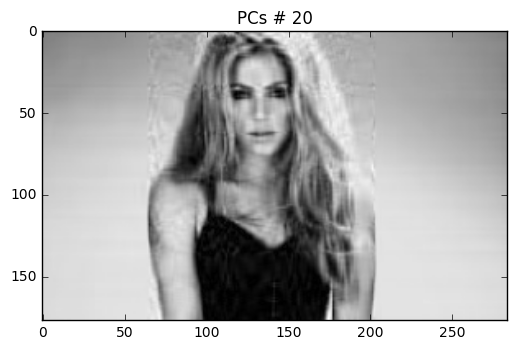

Shape of image is (177, 284)
Shape of eigen vector is (284, 30)
Shape of compressed image is (30, 177)
Compression is 0.27512532824063024


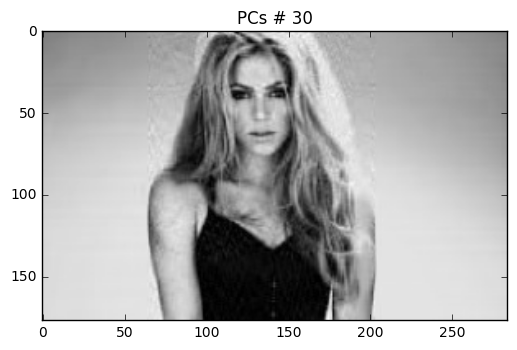

Shape of image is (177, 284)
Shape of eigen vector is (284, 40)
Shape of compressed image is (40, 177)
Compression is 0.36683377098750697


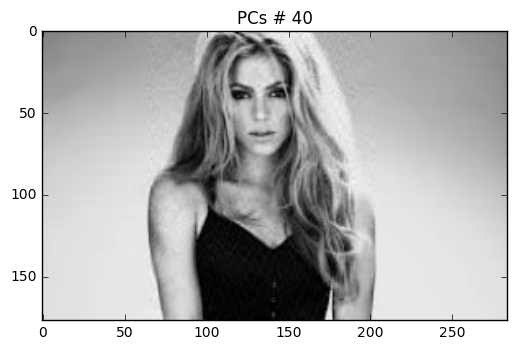

Shape of image is (177, 284)
Shape of eigen vector is (284, 50)
Shape of compressed image is (50, 177)
Compression is 0.4585422137343837


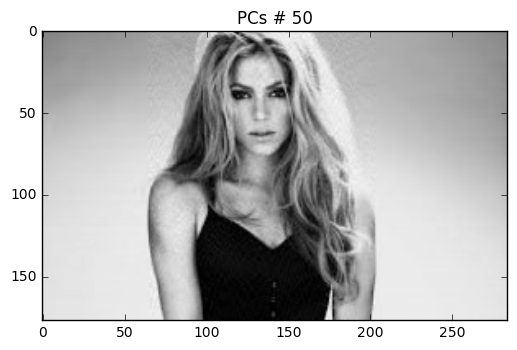

Shape of image is (177, 284)
Shape of eigen vector is (284, 60)
Shape of compressed image is (60, 177)
Compression is 0.5502506564812605


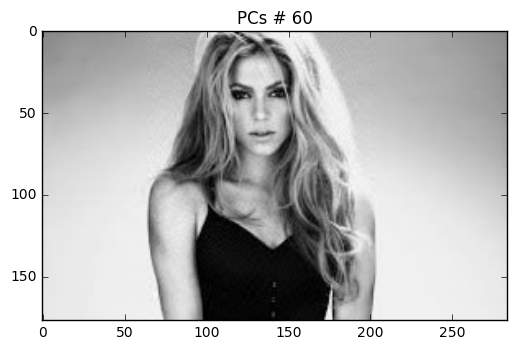

Shape of image is (177, 284)
Shape of eigen vector is (284, 70)
Shape of compressed image is (70, 177)
Compression is 0.6419590992281372


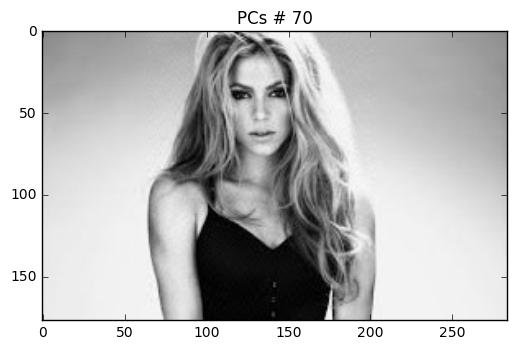

Shape of image is (177, 284)
Shape of eigen vector is (284, 80)
Shape of compressed image is (80, 177)
Compression is 0.7336675419750139


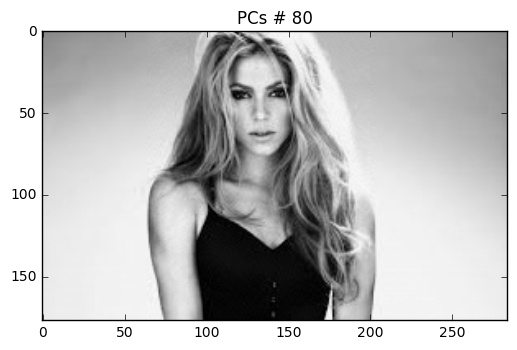

Shape of image is (177, 284)
Shape of eigen vector is (284, 90)
Shape of compressed image is (90, 177)
Compression is 0.8253759847218907


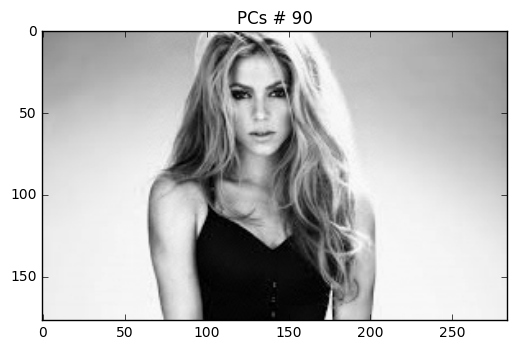

Shape of image is (177, 284)
Shape of eigen vector is (284, 100)
Shape of compressed image is (100, 177)
Compression is 0.9170844274687674


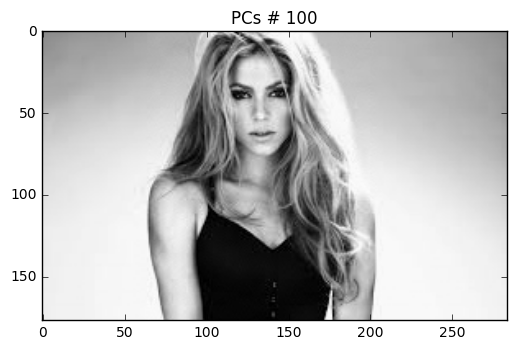

Shape of image is (177, 284)
Shape of eigen vector is (284, 110)
Shape of compressed image is (110, 177)
Compression is 1.0087928702156441


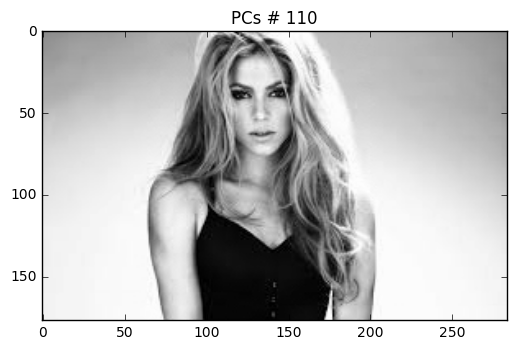

Shape of image is (177, 284)
Shape of eigen vector is (284, 120)
Shape of compressed image is (120, 177)
Compression is 1.100501312962521


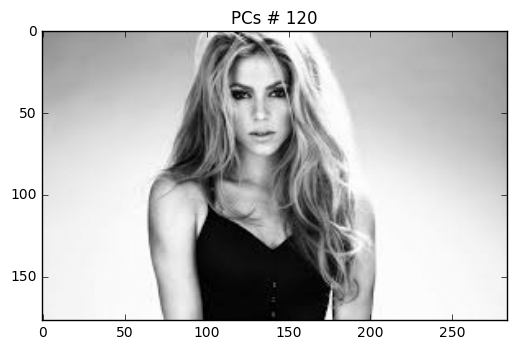

Shape of image is (177, 284)
Shape of eigen vector is (284, 130)
Shape of compressed image is (130, 177)
Compression is 1.1922097557093976


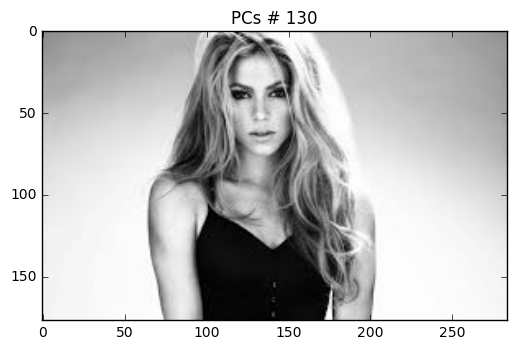

Shape of image is (177, 284)
Shape of eigen vector is (284, 140)
Shape of compressed image is (140, 177)
Compression is 1.2839181984562744


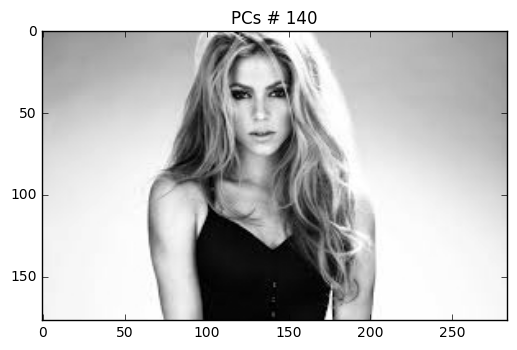

Shape of image is (177, 284)
Shape of eigen vector is (284, 150)
Shape of compressed image is (150, 177)
Compression is 1.375626641203151


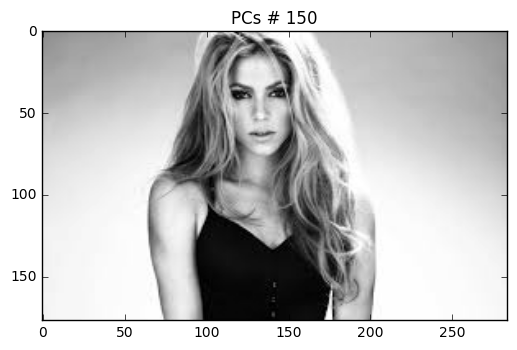

Shape of image is (177, 284)
Shape of eigen vector is (284, 160)
Shape of compressed image is (160, 177)
Compression is 1.4673350839500279


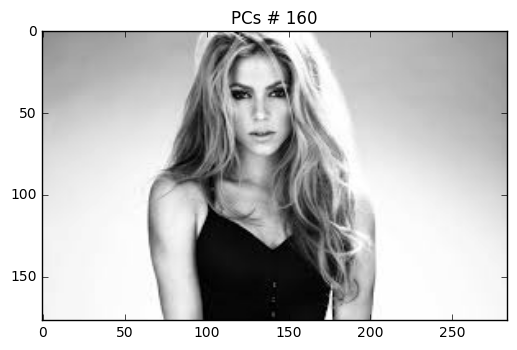

Shape of image is (177, 284)
Shape of eigen vector is (284, 170)
Shape of compressed image is (170, 177)
Compression is 1.5590435266969045


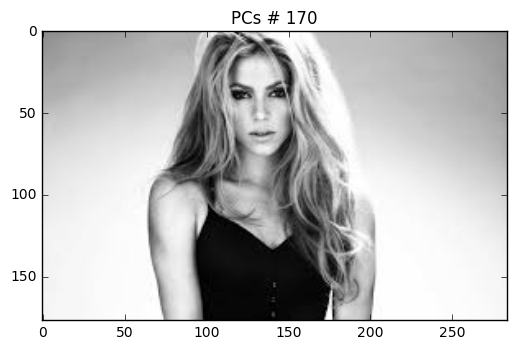

Shape of image is (177, 284)
Shape of eigen vector is (284, 180)
Shape of compressed image is (180, 177)
Compression is 1.6507519694437813


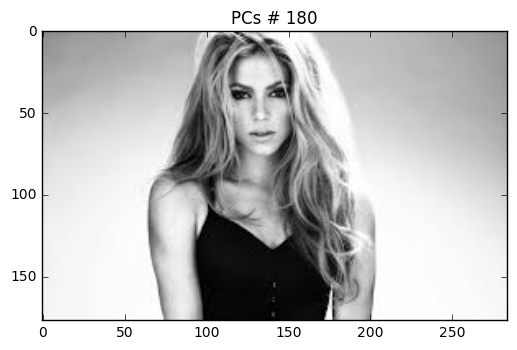

Shape of image is (177, 284)
Shape of eigen vector is (284, 190)
Shape of compressed image is (190, 177)
Compression is 1.7424604121906582


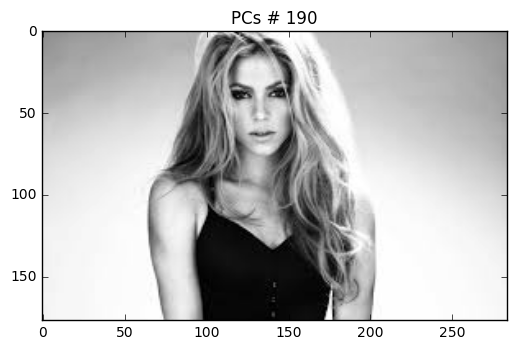

Shape of image is (177, 284)
Shape of eigen vector is (284, 200)
Shape of compressed image is (200, 177)
Compression is 1.8341688549375348


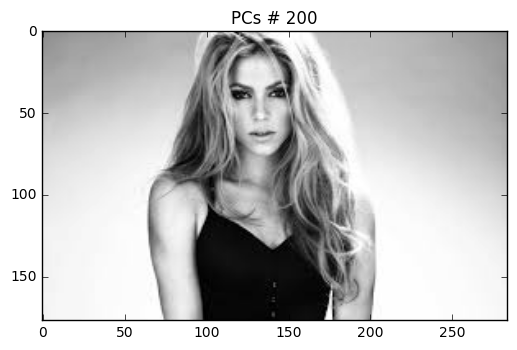

Shape of image is (177, 284)
Shape of eigen vector is (284, 210)
Shape of compressed image is (210, 177)
Compression is 1.9258772976844116


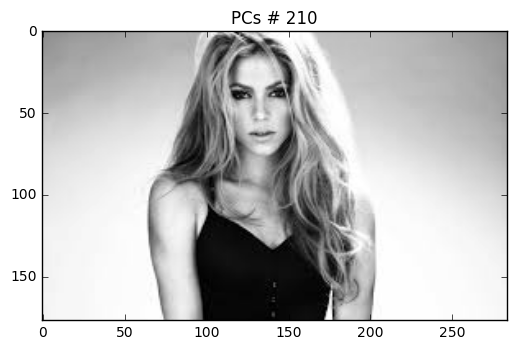

Shape of image is (177, 284)
Shape of eigen vector is (284, 220)
Shape of compressed image is (220, 177)
Compression is 2.0175857404312882


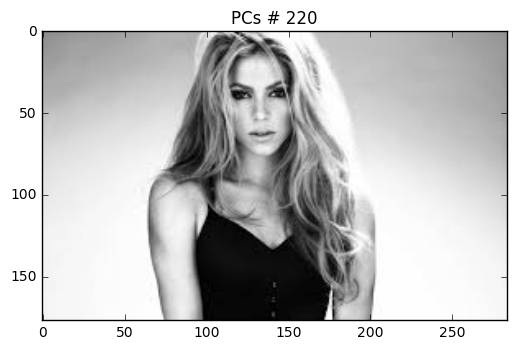

Shape of image is (177, 284)
Shape of eigen vector is (284, 230)
Shape of compressed image is (230, 177)
Compression is 2.109294183178165


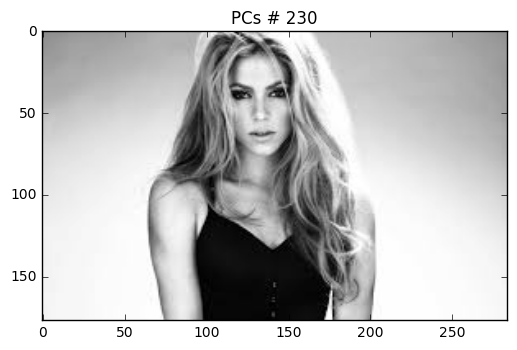

Shape of image is (177, 284)
Shape of eigen vector is (284, 240)
Shape of compressed image is (240, 177)
Compression is 2.201002625925042


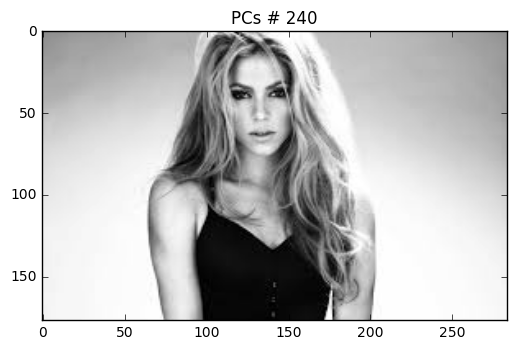

Shape of image is (177, 284)
Shape of eigen vector is (284, 250)
Shape of compressed image is (250, 177)
Compression is 2.2927110686719185


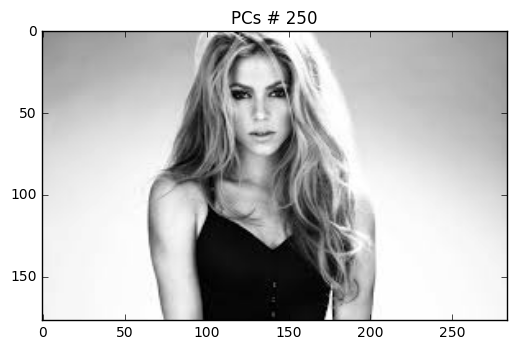

Shape of image is (177, 284)
Shape of eigen vector is (284, 260)
Shape of compressed image is (260, 177)
Compression is 2.384419511418795


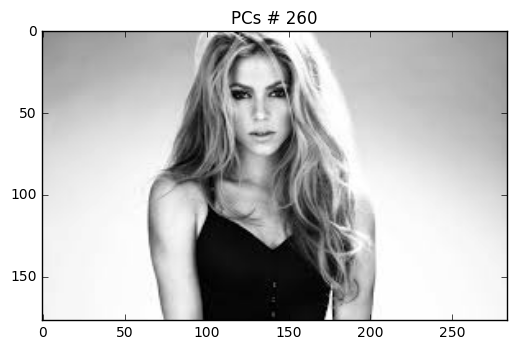

Shape of image is (177, 284)
Shape of eigen vector is (284, 270)
Shape of compressed image is (270, 177)
Compression is 2.476127954165672


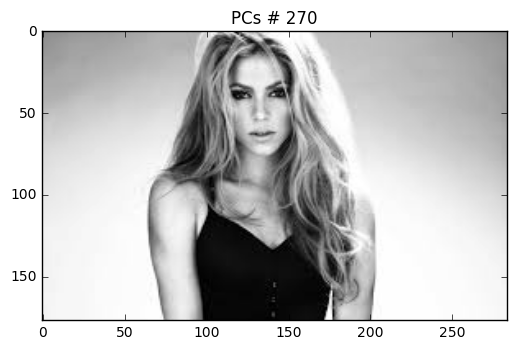

Shape of image is (177, 284)
Shape of eigen vector is (284, 280)
Shape of compressed image is (280, 177)
Compression is 2.567836396912549


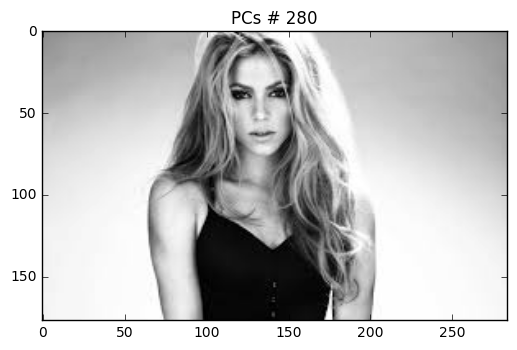

Shape of image is (177, 284)
Shape of eigen vector is (284, 284)
Shape of compressed image is (284, 177)
Compression is 2.6045197740112993


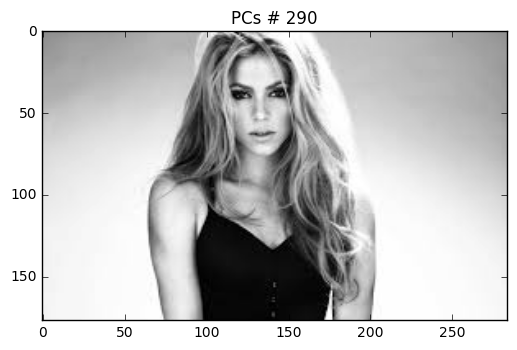

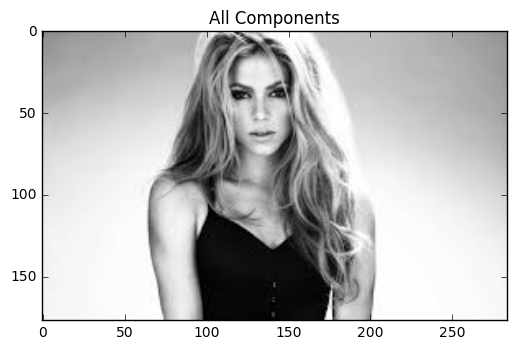

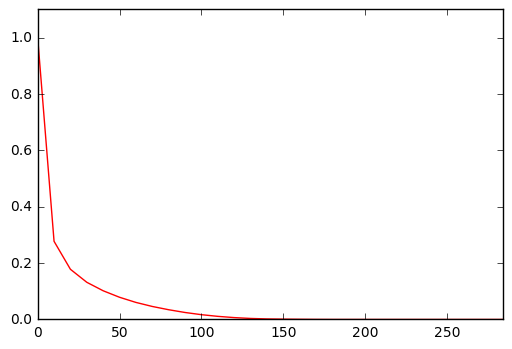

In [158]:
pca_driver()